In [1]:
import tensorflow as tf

2023-05-04 10:17:07.695492: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.__version__

'2.4.1'

In [15]:
# 경고무시하기
import warnings
warnings.filterwarnings('ignore')

### 분류 - MINIST 손글씨 분류하기

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
mnist = tf.keras.datasets.mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print(train_img[0].shape, len(train_img))
print(test_img[0].shape, len(test_img))

(28, 28) 60000
(28, 28) 10000


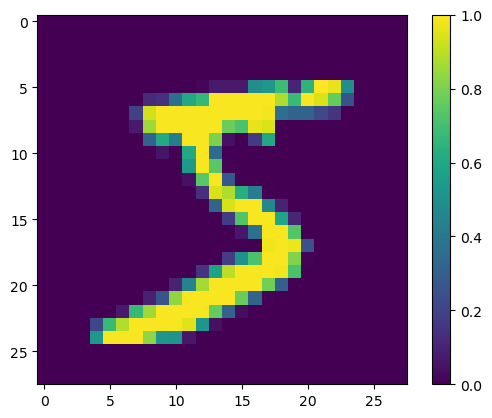

In [11]:
# 데이터 확인
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# 데이터 전처리
# 각 픽셀의 값을 0~1사이가 되도록 노멀라이징? 전처리 일반화인가...
# 0 ~ 1사이로 맞춰주는 이유는 숫자가 크면 인공지능은 높은 가중치를 주는데
# 이때 각 데이터끼리 단위가 다르면 단위가 큰 데이터가 높은 가중치를 갖게됨 
# 실제 가중치와는 상관이 없이!! 이걸 방지하고자 모든 데이터를 0 ~ 1사이로 맞춰주거나
# 최대값 - 최소값으로 맞춰주는 정규화 과정을 진행함

train_img = train_img / 255.0 
test_img = test_img / 255.0

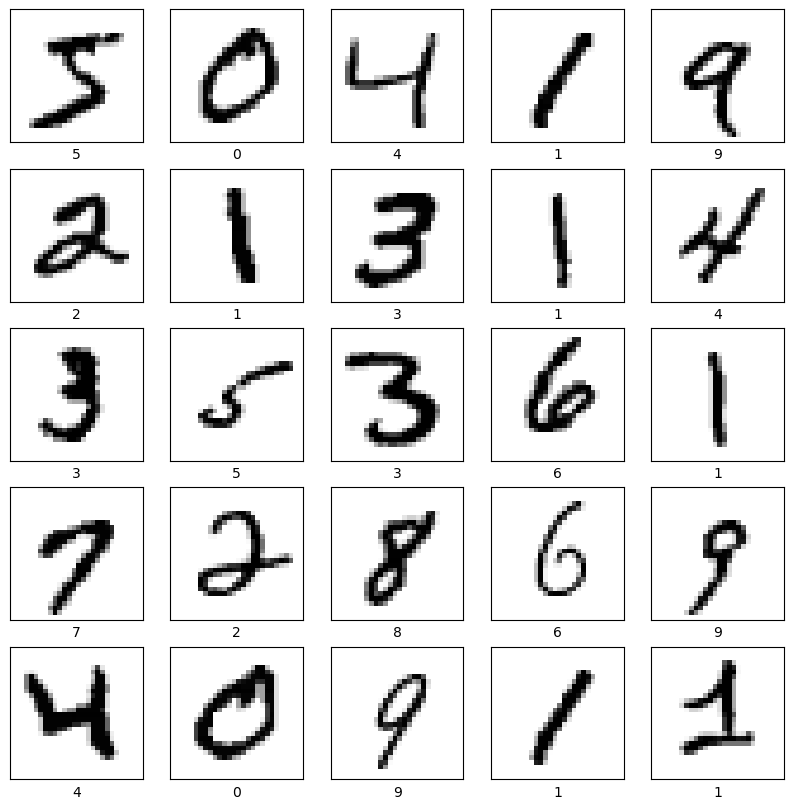

In [10]:
# 데이터 확인
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [18]:
# 그래프 모델 구현
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# 모델 학습
model.fit(train_img, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4813 - accuracy: 0.8608
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1550 - accuracy: 0.9545
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0875 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9761


In [21]:
# 모델 평가
model.evaluate(test_img, test_label, verbose=2)

313/313 - 1s - loss: 0.0781 - accuracy: 0.9754


[0.0780862420797348, 0.9753999710083008]

In [22]:
# 모델 예측 결과 만들기
predictions = model.predict(test_img)

In [23]:
predictions[0]

array([3.6218260e-08, 8.5052063e-09, 1.0550621e-05, 2.8693170e-04,
       4.1707479e-12, 9.3054560e-08, 2.4124789e-14, 9.9969959e-01,
       6.4759269e-07, 2.1489905e-06], dtype=float32)

In [24]:
np.argmax(predictions[0]) 
# 가장 값이 큰 셀을 가져와라
# 그럼 확률이 가장 높은 걸 알려줌

7

In [25]:
test_label[0]

7